### Introduction
The major aim of this project is to webscrape Nigeria inflation data from worlddata.info, then draw some insights from the data.

In [29]:
# The url to extract data from
url = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"

Import the neccesary libraries

In [30]:
from bs4 import BeautifulSoup # parsing the HTML contents
import requests # requests for approval for the data to be web scrapped, and also to get the html contents
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
r = requests.get(url)
#r.status_code
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE HTML>
<html lang="en"><head><meta charset="utf-8"/><title>Inflation rates in Nigeria</title><link href="https://js.worlddata.info" rel="preconnect"/><link href="https://js.worlddata.info" rel="dns-prefetch"/><link href="https://cdn.worlddata.info" rel="preconnect"/><link href="https://cdn.worlddata.info" rel="dns-prefetch"/><link href="https://www.laenderdaten.info/Afrika/Nigeria/inflationsraten.php" hreflang="de" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" hreflang="en" rel="alternate"/><link href="https://www.datosmundial.com/africa/nigeria/inflacion.php" hreflang="es" rel="alternate"/><link href="https://www.dadosmundiais.com/africa/nigeria/inflacao.php" hreflang="pt-BR" rel="alternate"/><link href="https://www.donneesmondiales.com/afrique/nigeria/inflation.php" hreflang="fr" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" id="canonical" rel="canonical"/><meta content="Development o

In [32]:
#Extracting the DataFrame column titles
list_row = []
for header in soup.find_all("th"):
    list_row.append(header.text)

df = pd.DataFrame(columns= list_row)
df

,Year,Nigeria,Ø EU,Ø USA,Ø World


In [33]:
#Extracting the table content adding it to the DataFrame
tr_ = soup.find_all("tr")
list_of_rows = []
for table_row in range(1,len(tr_)):   
    list_for_each_row = []
    tr_mini = tr_[table_row]
    for row in tr_mini:
        list_for_each_row.append(row.text)
    list_of_rows.append(list_for_each_row)

for i in list_of_rows:
    df.loc[len(df)] = i
    
df.head()
#list_of_rows

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.48 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.10 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %


In [34]:
# renaming the column name to remove Ø sign
df.rename(columns= {'Ø EU': 'EU',
                   'Ø USA': 'USA',
                  'Ø World': 'World'}, inplace=True)

In [35]:
df.columns

Index(['Year', 'Nigeria', 'EU', 'USA', 'World'], dtype='object')

In [36]:
# checking for the shape of my data
df.shape

(62, 5)

In [37]:
#Removing the % sign from the values
cols = ['Nigeria','EU','USA','World']
df[cols] = df[cols].replace({'%':''}, regex=True)

In [38]:
df.head()

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.48
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.10,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19


In [39]:
df.isnull().sum()

Year       0
Nigeria    0
EU         0
USA        0
World      0
dtype: int64

In [40]:
df.dtypes

Year       object
Nigeria    object
EU         object
USA        object
World      object
dtype: object

In [41]:
df['World'].unique()

array(['3.48 ', '1.92 ', '2.19 ', '2.44 ', '1.55 ', '1.43 ', '2.35 ',
       '2.62 ', '3.73 ', '4.82 ', '3.35 ', '2.94 ', '8.95 ', '4.28 ',
       '4.11 ', '3.38 ', '3.03 ', '2.83 ', '3.84 ', '3.49 ', '3.08 ',
       '5.11 ', '5.57 ', '6.55 ', '9.15 ', '10.32 ', '7.51 ', '7.71 ',
       '9.00 ', '8.13 ', '7.00 ', '7.15 ', '5.76 ', '5.82 ', '6.86 ',
       '8.12 ', '8.77 ', '10.24 ', '12.47 ', '13.98 ', 'n/a'],
      dtype=object)

In [42]:
df['World'] = df['World'].replace({'n/a':'13.98'}, regex=True)

In [43]:
df = df.astype(float)

In [44]:
df['Year']= df['Year'].astype(int)

In [45]:
df.dtypes

Year         int32
Nigeria    float64
EU         float64
USA        float64
World      float64
dtype: object

In [46]:
df.head()

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.48
1,2020,13.25,0.50,1.23,1.92
2,2019,11.40,1.63,1.81,2.19
3,2018,12.10,1.74,2.44,2.44
4,2017,16.52,1.43,2.13,2.19


### Data Exploration

##### 1. Which year has the highest and lowest inflation rate in Nigeria?

In [47]:
#the year with highest inflation in Nigeria
df.loc[lambda df: df['Nigeria'] == df.Nigeria.max()][['Year','Nigeria']]

,Year,Nigeria
26,1995,72.84


In [48]:
#Year with the lowest inflation in Nigeria
df.loc[lambda df: df['Nigeria'] == df.Nigeria.min()][['Year','Nigeria']]

,Year,Nigeria
54,1967,-3.73


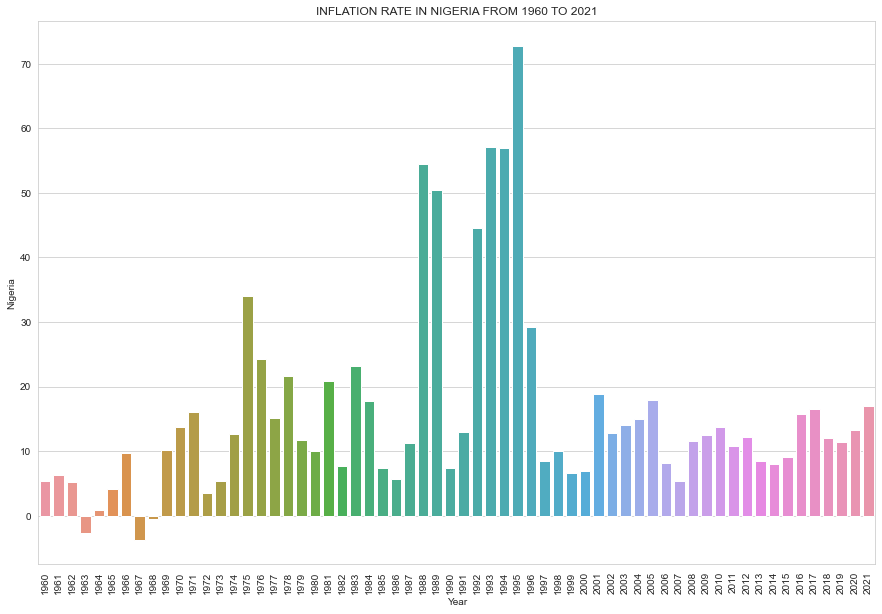

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.set_style('whitegrid')
sb.barplot(x= df.Year, y= df['Nigeria'], ci=None, estimator=sum)
plt.title('INFLATION RATE IN NIGERIA FROM 1960 TO 2021')
plt.xticks(rotation='vertical')
plt.savefig("barplot.png")
plt.show()

1995 has the highest infaltion rate with 72.84%. 
While 1967 has the lowest rate with -3.73%.

##### 2. Comparing the inflation rate between Nigeria, EU, USA and The World.

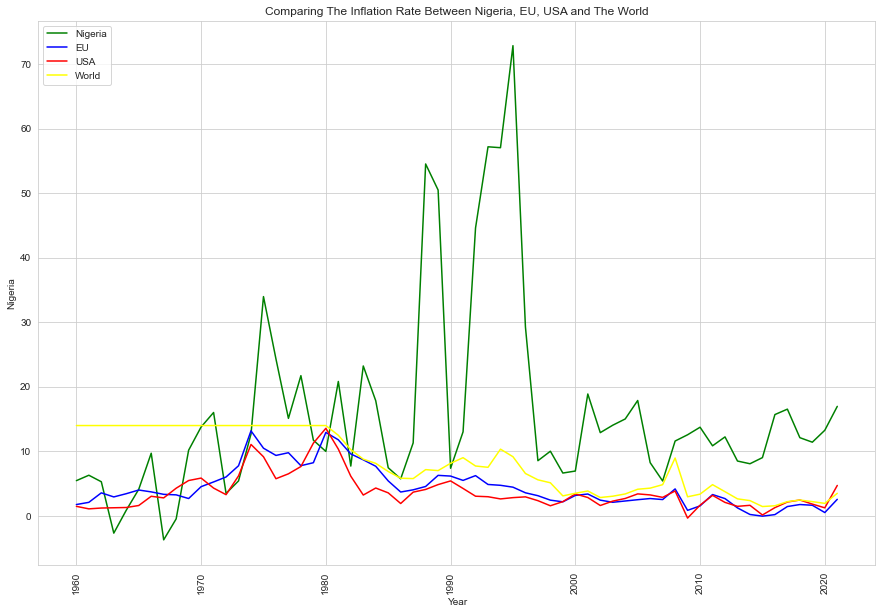

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.lineplot(data=df, x='Year', y='Nigeria', color='green')
sb.lineplot(data=df, x='Year', y='EU', color='blue')
sb.lineplot(data=df, x='Year', y='USA', color='red')
sb.lineplot(data=df, x='Year', y='World', color='yellow')
plt.legend(['Nigeria','EU', 'USA', 'World'], loc= 'upper left')
plt.title('Comparing The Inflation Rate Between Nigeria, EU, USA and The World')
plt.xticks(rotation='vertical')
plt.savefig("lineplot.png")
plt.show()

Nigeria's inflation rate is the highest over the years among EU, USA and the World. But lower than the global average between 1960 to 1970. And has it's peak between 1990 and 1996.

### OBSERVATION
These indicate that Nigeria has a higher inflation rate than other countries since 1990 to 2021. Also, Nigerian inflation trend has the highest irregular variation. 1995 is the highest year on record, saw a particularly high increase with 72% inflation rate. Although in 1963, 1967, and 1968 we had rates below 0 with -2.69%, -3.73%, and -0.48 respectively. Between 1960 and 179%, the global inflation rate remained constant at 2.19%. However, it increased to 13.98% in 1980, the highest recorded rate. Comparing these countries, the USA has the best control over inflation. However, they were also impacted by the 1980 inflation rate, which peaked at 13.55% but quickly declined to 3.21% in 1983.